# <span style="color:green"> ESERCITAZIONE 11 </span>

### <span style="color:blue">  Esercizio 11.0 </span> 
<span style="color:blue"> Il tuo primo problema di machine learning: regressione lineare della retta $f(x)=2x+1$. Riporto l'esempio gia' esposto nel testo dell'Esercitazione $11$. </span> 

La retta ha equazione: $y=mx+b$, con $m=2$ e $b=1$. Generiamo il set di dati iniziale, dati di training e di test separati. In questo esercizio non eseguire le caselle che iniziano con le righe con gli #: queste serviranno per l'esercizio $11.1$, in cui viene richiesto di variare i parametri e osservare cosa succede.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Assegno i parametri della retta.
m=2
b=1

In [3]:
#ASSEGNAZIONI ESERCIZIO 11.0.

#Noise standard deviation, per ora assente: rumore sui dati iniziali.
#Se ne cambio i valori, i dati/punti rossi non sono su una retta, ma piu' sparsi.
sigma = 0.0 

#Numero di dati di training.
n_train = 500

#Numero di epoche e di elementi del gruppetto in cui suddivido i dati.
n_epochs = 30
n_batch = 32

In [ ]:
##################################
#ASSEGNAZIONE SIGMA ESERCIZIO 11.1
sigma = 0.0

In [ ]:
####################################
#ASSEGNAZIONE N_TRAIN ESERCIZIO 11.1
n_train = 500
n_batch = 32

In [4]:
#####################################
#ASSEGNAZIONE N_EPOCHS ESERCIZIO 11.1
n_epochs = 30

In [5]:
print('sigma =', sigma)
print('numero di dati di training =', n_train)
print('numero di dati nel batch =', n_batch)
print('numero di epoche =', n_epochs)

sigma = 0.0
numero di dati di training = 500
numero di dati nel batch = 32
numero di epoche = 30


In [6]:
np.random.seed(0) #Genero dati tra -1 e 1 per x, Gaussiana per y.
x_train = np.random.uniform(-1, 1, n_train) #Dati di training.
x_valid = np.random.uniform(-1, 1, 50) #Dati di test.

x_valid.sort() #Li metto in ordine per visualizzarli meglio.
y_target = m * x_valid + b #Target: funzione lineare ideale. Non conosco la legge!

#Misure attuali da cui faremo la regressione lineare = trovo i parametri della retta.
#A partire da questi punti di coordinate x-y trovo la legge che li rappresenta.
y_train = np.random.normal(m * x_train + b, sigma) #y di train.
y_valid = np.random.normal(m * x_valid + b, sigma) #y di test.

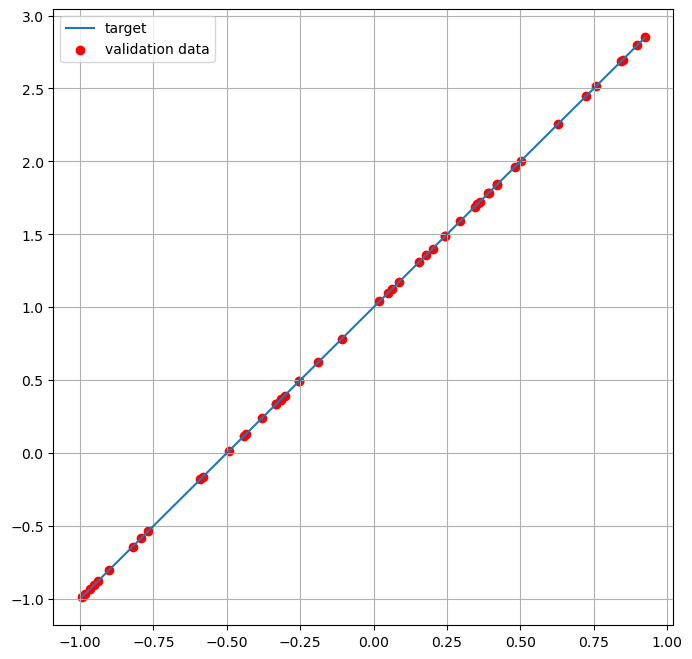

In [7]:
plt.figure(figsize=(8,8))

#Io non conosco questa legge: ho dei punti da cui devo estrapolare la retta che fa il fit.
plt.plot(x_valid, y_target, label='target') #Retta della legge.

#Faccio il grafico del punti con cui faro' regressione lineare. 
plt.scatter(x_valid, y_valid, color='r', label='validation data') #Dati di test.

plt.legend()
plt.grid(True)
plt.show()

In [8]:
#Digitare sulla riga di comando da terminale:
#module load python3/anaconda per jupyter notebook.
#source activate DeepLearning per Tensorflow e Keras.

#Per trovare la retta che faccia il fit, costruisco un modello di rete neurale, NN.
import tensorflow as tf #Importo le librerie generiche per costruire le reti neurali.
from tensorflow import keras

#Importo le librerire specifiche per costruire il modello di rete neurale.
#Elementi: modello del layer, come interagiscono i layer, tipo della funzione di attivazione.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

#Importo le librerie per stampare le caratteristiche e le prestazioni.
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

2024-06-19 17:07:47.947646: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
model = tf.keras.Sequential() #Definisco il modello del layer: tanti neuroni in linea retta.
model.add(Dense(1, input_shape=(1,))) #In questo caso molto semplice, c'e' un solo neurone: 1. , activation='relu'
#input_shape=(1,) = il neurone lavora con un solo tipo di dato iniziale: x.
#Dense = tipo di interazione tra i neuroni: tutti interagiscono con tutti.

#Compilo il modello scegliendo ottimizzatore, funzione costo e metrica.
#sdg = stocastic gradient descent, mse = mean square error. 
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

#Attenzione! Ogni volta che compili model, ti cambia il nome del layer di neuroni!

2024-06-19 17:08:10.198915: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-19 17:08:10.199338: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [10]:
#Riassunto del modello.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [11]:
#Fit del modello usando training dataset: 
#numero di epoche = n_epochs, numero di dati nel gruppetto = n_batch
#Riporto il progresso dei dati di training confrontato con i dati di test.
history = model.fit(x=x_train, y=y_train, 
          batch_size=n_batch, epochs=n_epochs,
          shuffle=True, 
          validation_data=(x_valid, y_valid))

Epoch 1/30
16/16 [==============================] - 0s 7ms/step - loss: 2.0478 - mse: 2.0478 - val_loss: 1.4812 - val_mse: 1.4812
Epoch 2/30
16/16 [==============================] - 0s 2ms/step - loss: 1.4450 - mse: 1.4450 - val_loss: 1.0702 - val_mse: 1.0702
Epoch 3/30
16/16 [==============================] - 0s 2ms/step - loss: 1.0561 - mse: 1.0561 - val_loss: 0.7975 - val_mse: 0.7975
Epoch 4/30
16/16 [==============================] - 0s 2ms/step - loss: 0.7925 - mse: 0.7925 - val_loss: 0.6114 - val_mse: 0.6114
Epoch 5/30
16/16 [==============================] - 0s 2ms/step - loss: 0.6088 - mse: 0.6088 - val_loss: 0.4761 - val_mse: 0.4761
Epoch 6/30
16/16 [==============================] - 0s 2ms/step - loss: 0.4741 - mse: 0.4741 - val_loss: 0.3755 - val_mse: 0.3755
Epoch 7/30
16/16 [==============================] - 0s 2ms/step - loss: 0.3731 - mse: 0.3731 - val_loss: 0.2980 - val_mse: 0.2980
Epoch 8/30
16/16 [==============================] - 0s 2ms/step - loss: 0.2954 - mse: 0.29

In [12]:
#Restituisce i pesi e i bias = m e b. Sono i risultati del fit!
model.get_weights()

[array([[1.9214803]], dtype=float32), array([0.9992782], dtype=float32)]

In [13]:
#Valuta le performance del modello e le stampa.
score = model.evaluate(x_valid, y_valid, batch_size=n_batch, verbose=1)

print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 1ms/step - loss: 0.0020 - mse: 0.0020

Test loss: 0.001961292000487447
Test accuracy: 0.001961292000487447


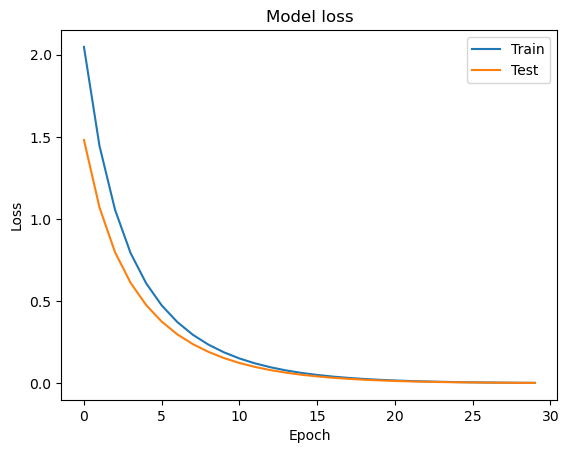

In [14]:
#Look into training history: plot training & validation loss values.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.legend(['Train', 'Test'], loc='best')
plt.show()

4/4 [==============================] - 0s 715us/step


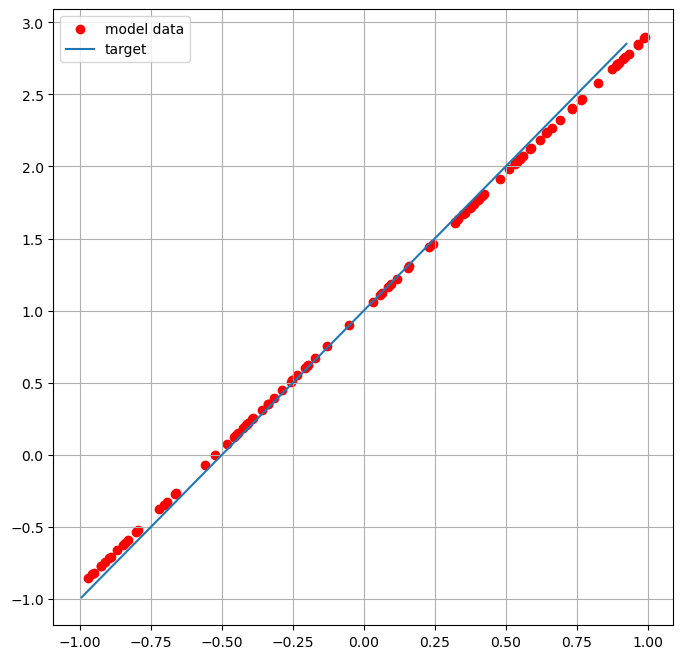

In [16]:
#Adesso ho il modello: voglio generare dei punti usandolo.
x_predicted = np.random.uniform(-1, 1, 100) #Estraggo le x da una distribuzione uniforme.
y_predicted = model.predict(x_predicted) #Genero le y usando il modello: applico il modello alle x.

#Faccio il grafico dei punti predicted generati con il modello.
plt.figure(figsize=(8,8))
plt.scatter(x_predicted, y_predicted, color='r', label='model data')
plt.plot(x_valid, y_target, label='target') #Retta della legge.

plt.legend()
plt.grid(True)
plt.show()

In [19]:
#Definisco la funzione retta con i parametri trovati dal modello che ha fatto il fit.
def retta(x,m,b):
    return m*x + b

#Assegno i parametri trovati durante il fit. Valori iniziali.
#m = 1.9121106 #n_epoch = 30, n_train = 500, sigma = 0.0.
#b = 0.9994696 #n_epoch = 30, n_train = 500, sigma = 0.0.

#Modifico n_epoch.
#m = 0.88192 #n_epoch = 10, n_train = 500, sigma = 0.0.
#b = 0.9566167 #n_epoch = 10, n_train = 500, sigma = 0.0.
#m = 1.9913682 #n_epoch = 50, n_train = 500, sigma = 0.0.
#b = 0.99992585 #n_epoch = 50, n_train = 500, sigma = 0.0.
#m = 1.9989575 #n_epoch = 70, n_train = 500, sigma = 0.0.
#b = 0.9999893 #n_epoch = 70, n_train = 500, sigma = 0.0.

#Modifico n_train.  
#m=1.5802375 #n_epoch = 30, n_train = 300, sigma = 0.0.
#b=1.0002497 #n_epoch = 30, n_train = 300, sigma = 0.0.
#m=1.9786537 #n_epoch = 30, n_train = 700, sigma = 0.0.
#b=0.9997632 #n_epoch = 30, n_train = 700, sigma = 0.0.

#Modifico sigma. 
#m=1.9517787 #n_epoch = 30, n_train = 500, sigma = 0.1.
#b=0.9891656 #n_epoch = 30, n_train = 500, sigma = 0.1.
#m=1.925284 #n_epoch = 30, n_train = 500, sigma = 0.3.  
#b=0.967114 #n_epoch = 30, n_train = 500, sigma = 0.3.  
#m=2.0621161 #n_epoch = 30, n_train = 500, sigma = 1.2.  
#b=0.8729567 #n_epoch = 30, n_train = 500, sigma = 1.2.  

#Parametri finali scelti: n_epoch = 70, n_train = 600, sigma = 0.1.
#m=2.0048275 
#b=0.9939962

<Figure size 800x800 with 0 Axes>

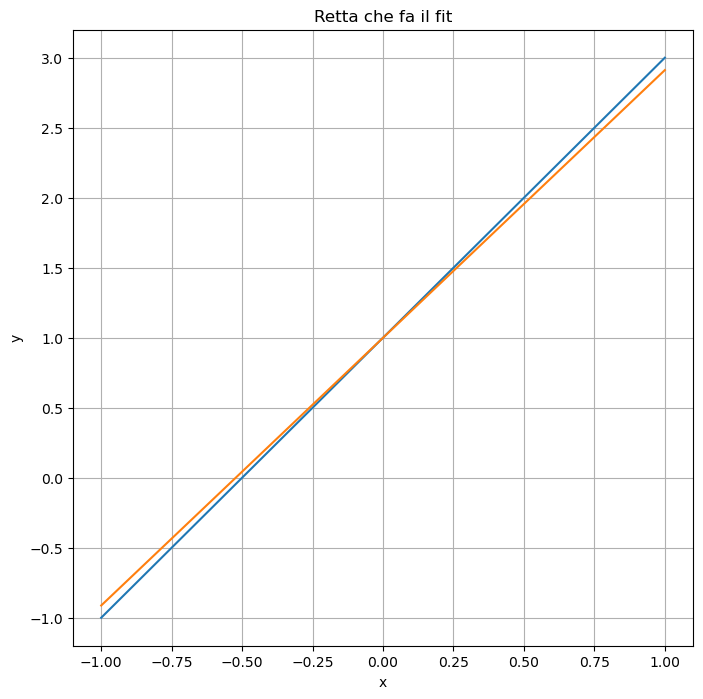

In [20]:
plt.figure(figsize=(8,8))
x = np.linspace(-1,1,200)

plt.figure(figsize=(8,8))
plt.title('Retta che fa il fit')
plt.xlabel('x')
plt.ylabel('y')

#Disegno le rette a confronto.
plt.plot(x,retta(x,2,1)) #Retta della legge, in azzurro.
plt.plot(x,retta(x,m,b)) #Retta che fa il fit, in giallo.
#plt.plot(x,retta(x,m,b)-retta(x,2,1)) #Differenza tra le due rette, dell'ordine di 10^(-3).

plt.grid(True)
plt.show()

### <span style="color:blue">  Esercizio 11.1 </span> 
<span style="color:blue">  Per fare pratica con le reti neurali, esplora come la regressione lineare dell'esercizio precedente cambia se si modificano a turno: il numero di epoche $N_{\mathrm{epochs}}$, il numero di dati di training $N_{\mathrm{train}}$ e il rumore sui dati $\sigma$. Trova i parametri giusti in modo che diano la regressione migliore possibile. </span> 

Per svolgere questo esercizio, uso il codice che ci è stato donato nel testo dell'Esercitazione $11$ e che ho riportato nell'esercizio precedente. I riquadri che iniziano con le righe con gli # sono da modificare a piacere con i valori che si vogliono assegnare ad ogni esecuzione. Durante l'esercizio precedente queste caselle non erano da considerare. Di seguito riporto i risultati dell'esecuzione per diversi valori assegnati parametri $N_{\mathrm{epochs}}$, $N_{\mathrm{train}}$ e $\sigma$. 

<span style="color:blue"> a. Cambio il numero di epoche </span>

$N_{\mathrm{epochs}}=30$. Caso iniziale. I valori di $m$ e $b$ sono molto vicini a quelli della teoria. Funzione costo minimizzata a $10^{-3}$, errore dell'ordine di $10^{-3}$.

$N_{\mathrm{epochs}}=10$. Valori ottenuti: $m=0.88192$, $b=0.9566167$, $m$ per niente buono. Loss $=4\times 10^{-2}$. Distanti le rette e le curve della loss.

$N_{\mathrm{epochs}}=50$. Valori ottenuti: $m=1.9913682$, $b=0.99992585$; i risultati sono migliorati, soprattutto $m$. Loss dell'ordine di $10^{-5}$: è più preciso! 

$N_{\mathrm{epochs}}=70$. Valori ottenuti: $m=1.9989575$, $b=0.9999893$; i risultati sono migliorati ulteriormente. Loss dell'ordine di $10^{-7}$: è sempre più preciso! 

**Osservazioni**. Con poche epoche i risultati sono distanti da quelli teorici e poco precisi. Aumentando il numero di epoche il risultato diventa sempre più preciso: $m$ si avvicina a $2$ e $b$ si avvicina a $1$. Fare tantissime epoche però ha un costo in tempo. Allora è opportuno scegliere un numero di epoche intermedio, che sia un buon compromesso tra avere un risultato vicino a quello atteso e non impiegare troppo tempo. Loss è la funzione costo, la quantità che deve essere minimizzata. Più è piccola la loss, più è preciso il risultato.

<span style="color:blue"> b. Cambio il numero di dati di training </span> 

$N_{\mathrm{train}}=500$. Caso iniziale. Mantengo il numero di epoche sempre uguale a $30$. Risultati: $m=1.9622757$, $b=0.9994849$, come prima.

$N_{\mathrm{train}}=300$. $m=1.5802375$, $b=1.0002497$, $b$ è buono ma $m$ no. Loss $=5\times 10^{-2}$, non è buona. 

$N_{\mathrm{train}}=700$. $m=1.9786537$, $b=0.9997632$, buoni ma andavano bene anche per $500$ epoche, qui un po' migliorati. Loss $=2\times 10^{-4}$. 

**Osservazioni**. Con pochi dati di training i risultati sono distanti da quelli teorici e poco precisi. Il numero di dati di training va aumentato ma se si aumenta troppo il risultato non migliora più e se eccessivo può causare overfitting. Scegliere il numero di dati di training minimo tale che dia il miglior risultato possibile.

<span style="color:blue"> c. Cambio il valore di sigma </span> 

$\sigma=0$. Caso iniziale. I dati sono distribuiti come previsto dalla legge. Nella realtà, facendo un esperimento, i dati non sono distribuiti precisamente come la legge comanda, ma avranno un rumore che rompe l'ordine. L'obiettivo di questo esercizio è aumentare un po' alla volta il rumore, vedere come i dati sono distribuiti (sempre più lontani tra loro) e osservare come la rete neurale fa la regressione di questi punti.

$\sigma=0.1$. I dati di training non sono più allineati secondo la retta della legge, ma spostati, sempre intorno alla retta. Dalla regressione lineare si ottiene: $m=1.9517787$ e $b=0.9891656$ con funzione costo $=10^{-2}$. La regressione è buona. Viene peggio rispetto al caso con sigma uguale a zero perché i dati sono più sparpagliati, quindi l'incertezza è maggiore. 

$\sigma=0.3$. I dati di training sono ancora più lontani. Dalla regressione si ottiene: $m=1.925284$ e $b=0.96711415$, con loss $=0.1$. I risultati della regressione diventano sempre più distanti dai valori teorici di $m$ e $b$ e la regressione è sempre meno accurata. Questo perché i dati generati all'inizio e su cui si effettua il test sono sempre più rumorosi e descrivono sempre meno la legge.

$\sigma=1.2$. Questo è un caso limite: i dati di training sono molto sparsi. Dalla regressione si ottiene: $m=2.0621161$ e $b=0.8729567$, con loss $=1.6$. I dati non sono accurati perché domina il rumore anziché la legge. 

**Osservazioni**. Per generare i dati di training, prendere $\sigma=0$ non è realistico, perché i dati sperimentali non sono mai distribuiti come comanda la legge che li genera, a causa della stocasticità. I dati reali sono generati dalla legge con l'aggiunta di un po' di rumore; se questo è alto non va bene, perché la legge che li descrive diventa un'altra. Quindi per generare i dati iniziali su cui fare il training, bisogna aggiungere alla legge che li genera $\sigma \ne 0$, ma piccolo. 

Ho scelto di esegure la regressione con: $N_{\mathrm{epochs}}=70$, $N_{\mathrm{train}}=600$ e $\sigma=0.1$. Risultati: $m=2.0048275$ e $b=0.9939962$ con loss $=0.01$ e viene bene.